# CODING FUZZY LOGIC ARTIFICIAL INTELLIGENCE

In [1]:
import numpy as np
import pandas as pd

data_mahasiswa = pd.read_csv("data mhs.csv")
data_mahasiswa

,mhs,ipk,gaji
0,A,3.00,10
1,B,2.99,1


In [2]:
# data ipk
data_ipk = np.array(data_mahasiswa)
data_ipk = data_ipk[:,[0,1]]

ipk_A = np.sum(data_ipk[0:1,1], axis=0)
ipk_B = np.sum(data_ipk[1:2,1], axis=0)

print("ipk_A: ", ipk_A)
print("ipk_B: ", ipk_B)

ipk_A:  3.0
ipk_B:  2.99


In [3]:
# data gaji
data_gaji = np.array(data_mahasiswa)
data_gaji = data_gaji[:,[0,2]]

gaji_A = np.sum(data_gaji[0:1,1], axis=0)
gaji_B = np.sum(data_gaji[1:2,1], axis=0)

print("gaji_A: ", gaji_A)
print("gaji_B: ", gaji_B)

gaji_A:  10
gaji_B:  1


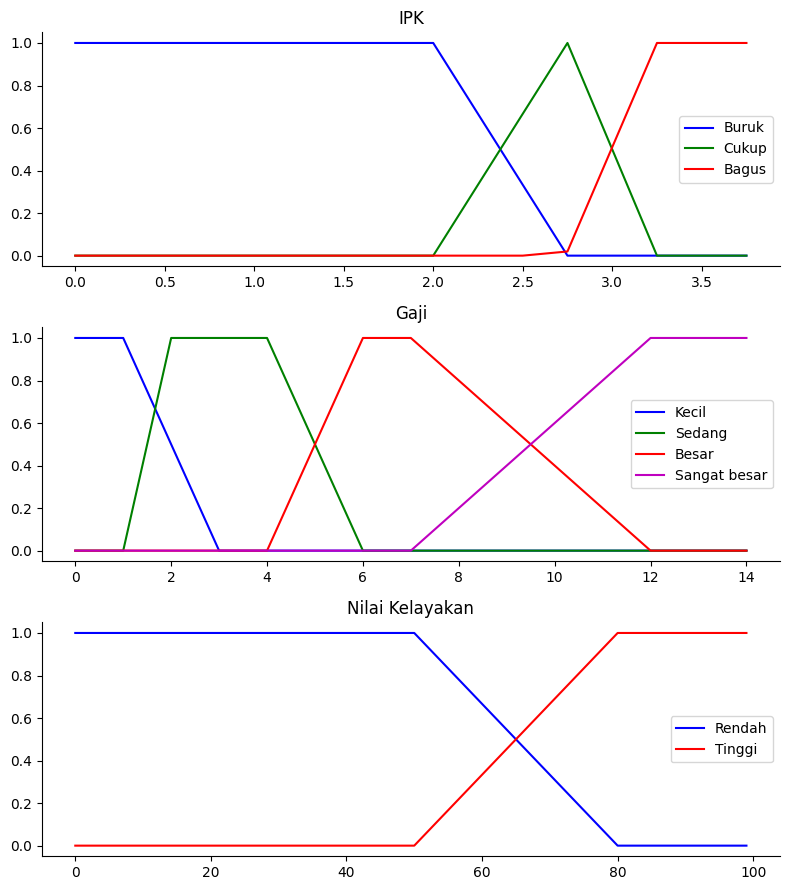

In [4]:
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import numpy as np

# Semesta Pembicaraan
x_ipk = np.arange(0, 4, 0.25)
x_gaji = np.arange(0, 15, 1)
x_nk = np.arange(0, 100, 1)

# Membership Function
# ipk
ipk_buruk = fuzz.trapmf(x_ipk, [0, 0, 2, 2.75])
ipk_cukup = fuzz.trimf(x_ipk, [2, 2.75, 3.25])
ipk_bagus = fuzz.trapmf(x_ipk, [2.74, 3.25, 4, 4])

# Gaji
gaji_kecil = fuzz.trapmf(x_gaji, [0, 0, 1, 3])
gaji_sedang = fuzz.trapmf(x_gaji, [1, 2, 4, 6])
gaji_besar = fuzz.trapmf(x_gaji, [4, 6, 7, 12])
gaji_sangat_besar = fuzz.trapmf(x_gaji, [7, 12, 15, 15])

# Nilai kelayakan
nk_rendah = fuzz.trapmf(x_nk, [0, 0, 50, 80])
nk_tinggi = fuzz.trapmf(x_nk, [50, 80, 100, 100])

# kurva membership function
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))

ax0.plot(x_ipk, ipk_buruk, 'b', linewidth=1.5, label='Buruk')
ax0.plot(x_ipk, ipk_cukup, 'g', linewidth=1.5, label='Cukup')
ax0.plot(x_ipk, ipk_bagus, 'r', linewidth=1.5, label='Bagus')
ax0.set_title('IPK')
ax0.legend()

ax1.plot(x_gaji, gaji_kecil, 'b', linewidth=1.5, label='Kecil')
ax1.plot(x_gaji, gaji_sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_gaji, gaji_besar, 'r', linewidth=1.5, label='Besar')
ax1.plot(x_gaji, gaji_sangat_besar, 'm', linewidth=1.5, label='Sangat besar')
ax1.set_title('Gaji')
ax1.legend()

ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, label='Rendah')
ax2.plot(x_nk, nk_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax2.set_title('Nilai Kelayakan')
ax2.legend()

for ax in (ax0, ax1, ax2) :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()



In [5]:

#Fungsi keanggotaan IPK
def fungsiKeanggotaan_IPK(_nilai):
    buruk = fuzz.interp_membership(x_ipk, ipk_buruk, _nilai)
    cukup = fuzz.interp_membership(x_ipk, ipk_cukup, _nilai)
    bagus = fuzz.interp_membership(x_ipk, ipk_bagus, _nilai)

    return buruk, cukup, bagus

#Fungsi keanggotaan Gaji
def fungsiKeanggotaan_Gaji(_nilai):
    kecil = fuzz.interp_membership(x_gaji, gaji_kecil, _nilai)
    sedang = fuzz.interp_membership(x_gaji, gaji_sedang, _nilai)
    besar = fuzz.interp_membership(x_gaji, gaji_besar, _nilai)
    sangat_besar = fuzz.interp_membership(x_gaji, gaji_sangat_besar, _nilai)

    return kecil, sedang, besar, sangat_besar

# menghitung derajat keanggotaan ipk
ipk_mhsA = fungsiKeanggotaan_IPK(ipk_A)
ipk_mhsB = fungsiKeanggotaan_IPK(ipk_B)

print("ipk mhsA: ", ipk_mhsA)
print("ipk mhsB: ", ipk_mhsB)

# menghitung derajat keanggotaan gaji
gaji_mhsA = fungsiKeanggotaan_Gaji(gaji_A)
gaji_mhsB = fungsiKeanggotaan_Gaji(gaji_B)

print("Gaji mhsA: ", gaji_mhsA)
print("Gaji mhsB: ", gaji_mhsB)

ipk mhsA:  (0.0, 0.5, 0.5098039215686272)
ipk mhsB:  (0.0, 0.5199999999999996, 0.4901960784313727)
Gaji mhsA:  (0.0, 0.0, 0.4, 0.6)
Gaji mhsB:  (1.0, 0.0, 0.0, 0.0)
